In [ ]:
!nvidia-smi


Mon Jan 19 06:56:49 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P0             25W /   70W |     234MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/



 1000116519.jpg
 1732630255020.jpg
 1747498471512.jpg
'4MC22IS064_Provisional_Grade_Card (1) (1).pdf'
'4MC22IS064_Provisional_Grade_Card (1).pdf'
'4MC22IS064_Provisional_Grade_Card (2) (1).pdf'
'4MC22IS064_Provisional_Grade_Card (2).pdf'
'4MC22IS064_Provisional_Grade_Card (3).pdf'
'Activity Guidelines (1).pdf'
'Activity Guidelines.pdf'
 certificate-20251107095042.png
 certificate-of-completion-for-internship-on-full-stack-web-development.pdf
'Colab Notebooks'
 ColabProjects
'Cyber Security and Privacy (2).pdf'
 data
 Document.pdf
'DTL ppt(1).pptx'
'Ethical Hacking.pdf'
 Future_forge.pptx
 iLovePDF
 IMG-20240123-WA0006.jpeg
 IMG20240129135133.jpg
 IMG_20240129_135256.jpg
 IMG_20240129_135313.jpg
 IMG-20240816-WA0015.jpg
 IMG-20240816-WA0016.jpg
 IMG-20240816-WA0017.jpg
 IMG_20250404_225543.jpg
 jhsp102.pdf
 Jovian
 megha
 meghaFinal.pdf
 meghana
 Meghana-1.pdf
'Meghana_4MC22IS064 (1).pdf'
 Meghana_4MC22IS064.pdf
 Meghana.jpeg
'Meghana K (1).pdf'
'Meghanak.ise.resume(1).docx.resume (1).d

In [ ]:
labels = {
    '/content/drive/MyDrive/satellite-image-classification/data/cloudy': 'Cloudy',
    '/content/drive/MyDrive/satellite-image-classification/data/desert': 'Desert',
    '/content/drive/MyDrive/satellite-image-classification/data/green_area': 'Green_Area',
    '/content/drive/MyDrive/satellite-image-classification/data/water': 'Water',
}


In [ ]:
import pandas as pd
import os

data = pd.DataFrame(columns=['image_path', 'label'])

for folder, label in labels.items():
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        data.loc[len(data)] = [image_path, label]

data.to_csv('image_dataset.csv', index=False)
print("CSV created successfully!")


CSV created successfully!


In [ ]:
df = pd.read_csv('image_dataset.csv')
df.head()


,image_path,label
0,/content/drive/MyDrive/satellite-image-classif...,Cloudy
1,/content/drive/MyDrive/satellite-image-classif...,Cloudy
2,/content/drive/MyDrive/satellite-image-classif...,Cloudy
3,/content/drive/MyDrive/satellite-image-classif...,Cloudy
4,/content/drive/MyDrive/satellite-image-classif...,Cloudy


In [ ]:
!ls /content/drive/MyDrive/satellite-image-classification/data/cloudy



train_10021.jpg  train_17513.jpg  train_26562.jpg  train_36520.jpg
train_10043.jpg  train_17549.jpg  train_26564.jpg  train_36529.jpg
train_10070.jpg  train_17552.jpg  train_26572.jpg  train_36537.jpg
train_10081.jpg  train_17556.jpg  train_26600.jpg  train_36545.jpg
train_10096.jpg  train_17565.jpg  train_26643.jpg  train_36559.jpg
train_10128.jpg  train_17569.jpg  train_2664.jpg   train_36564.jpg
train_10166.jpg  train_1756.jpg   train_26658.jpg  train_3657.jpg
train_10173.jpg  train_17584.jpg  train_26673.jpg  train_36582.jpg
train_10177.jpg  train_17610.jpg  train_26722.jpg  train_36600.jpg
train_101.jpg	 train_17622.jpg  train_26814.jpg  train_36603.jpg
train_10201.jpg  train_17643.jpg  train_26882.jpg  train_36669.jpg
train_10224.jpg  train_17662.jpg  train_26892.jpg  train_36687.jpg
train_10225.jpg  train_17702.jpg  train_26916.jpg  train_36735.jpg
train_10231.jpg  train_17722.jpg  train_26957.jpg  train_36750.jpg
train_10263.jpg  train_17762.jpg  train_2699.jpg   train_36754.jp

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(255,255,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=16,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=16,
    class_mode='sparse'
)


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [35]:
history = model.fit(
    train_generator,0
    epochs=5,
    validation_data=test_generator
)


Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1201s 4s/step - accuracy: 0.6855 - loss: 0.6989 - val_accuracy: 0.8394 - val_loss: 0.4019
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.8218 - loss: 0.4093 - val_accuracy: 0.8048 - val_loss: 0.4233
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.8589 - loss: 0.3519 - val_accuracy: 0.7098 - val_loss: 0.6171
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8003 - loss: 0.4347 - val_accuracy: 0.8305 - val_loss: 0.3989
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.8734 - loss: 0.3106 - val_accuracy: 0.8270 - val_loss: 0.3512


In [36]:

score = model.evaluate(test_generator)
print("Test Accuracy:", score[1])


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8127 - loss: 0.3648
Test Accuracy: 0.8269742727279663


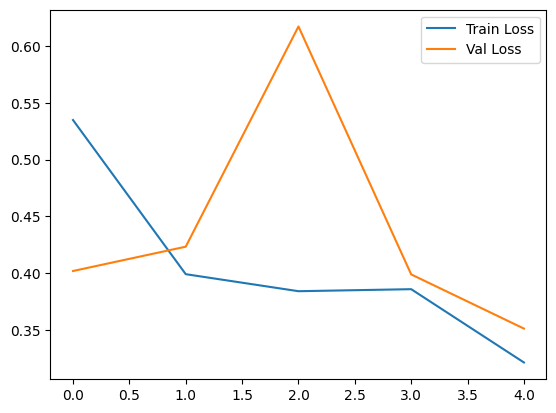

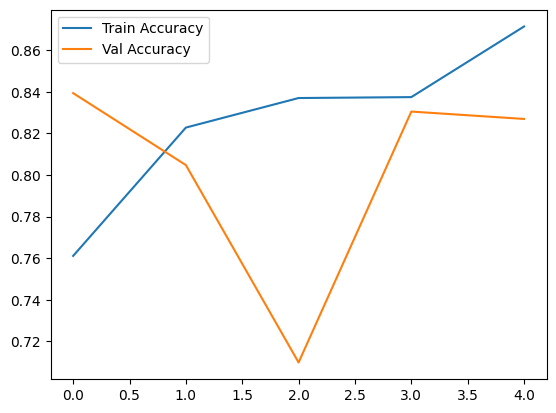

In [37]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [38]:
# Save model (recommended format)
model.save('Satellite_Model.keras')

# Load model
from tensorflow.keras.models import load_model
model = load_model('Satellite_Model.keras')

# Recompile (recommended)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [39]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

img = load_img(
    '/content/drive/MyDrive/satellite-image-classification/data/green_area/Forest_99.jpg',
    target_size=(128,128)   # ✅ FIXED
)

img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = class_names[np.argmax(prediction)]

print("Predicted:", predicted_label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Predicted: Green_Area


In [40]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = test_generator.classes

cm = confusion_matrix(actual_labels, predicted_labels)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


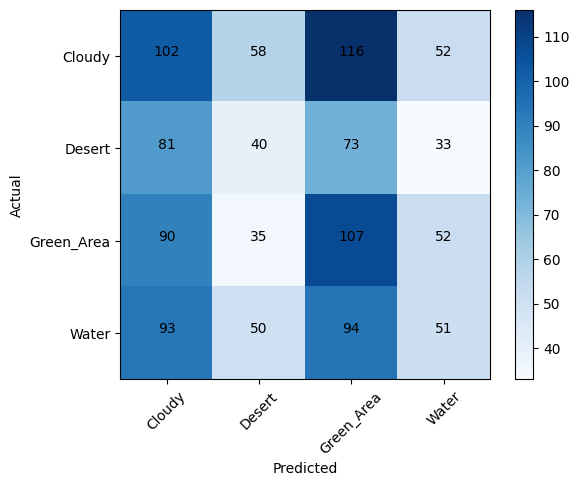

In [41]:
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(4), class_names, rotation=45)
plt.yticks(range(4), class_names)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], ha='center')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


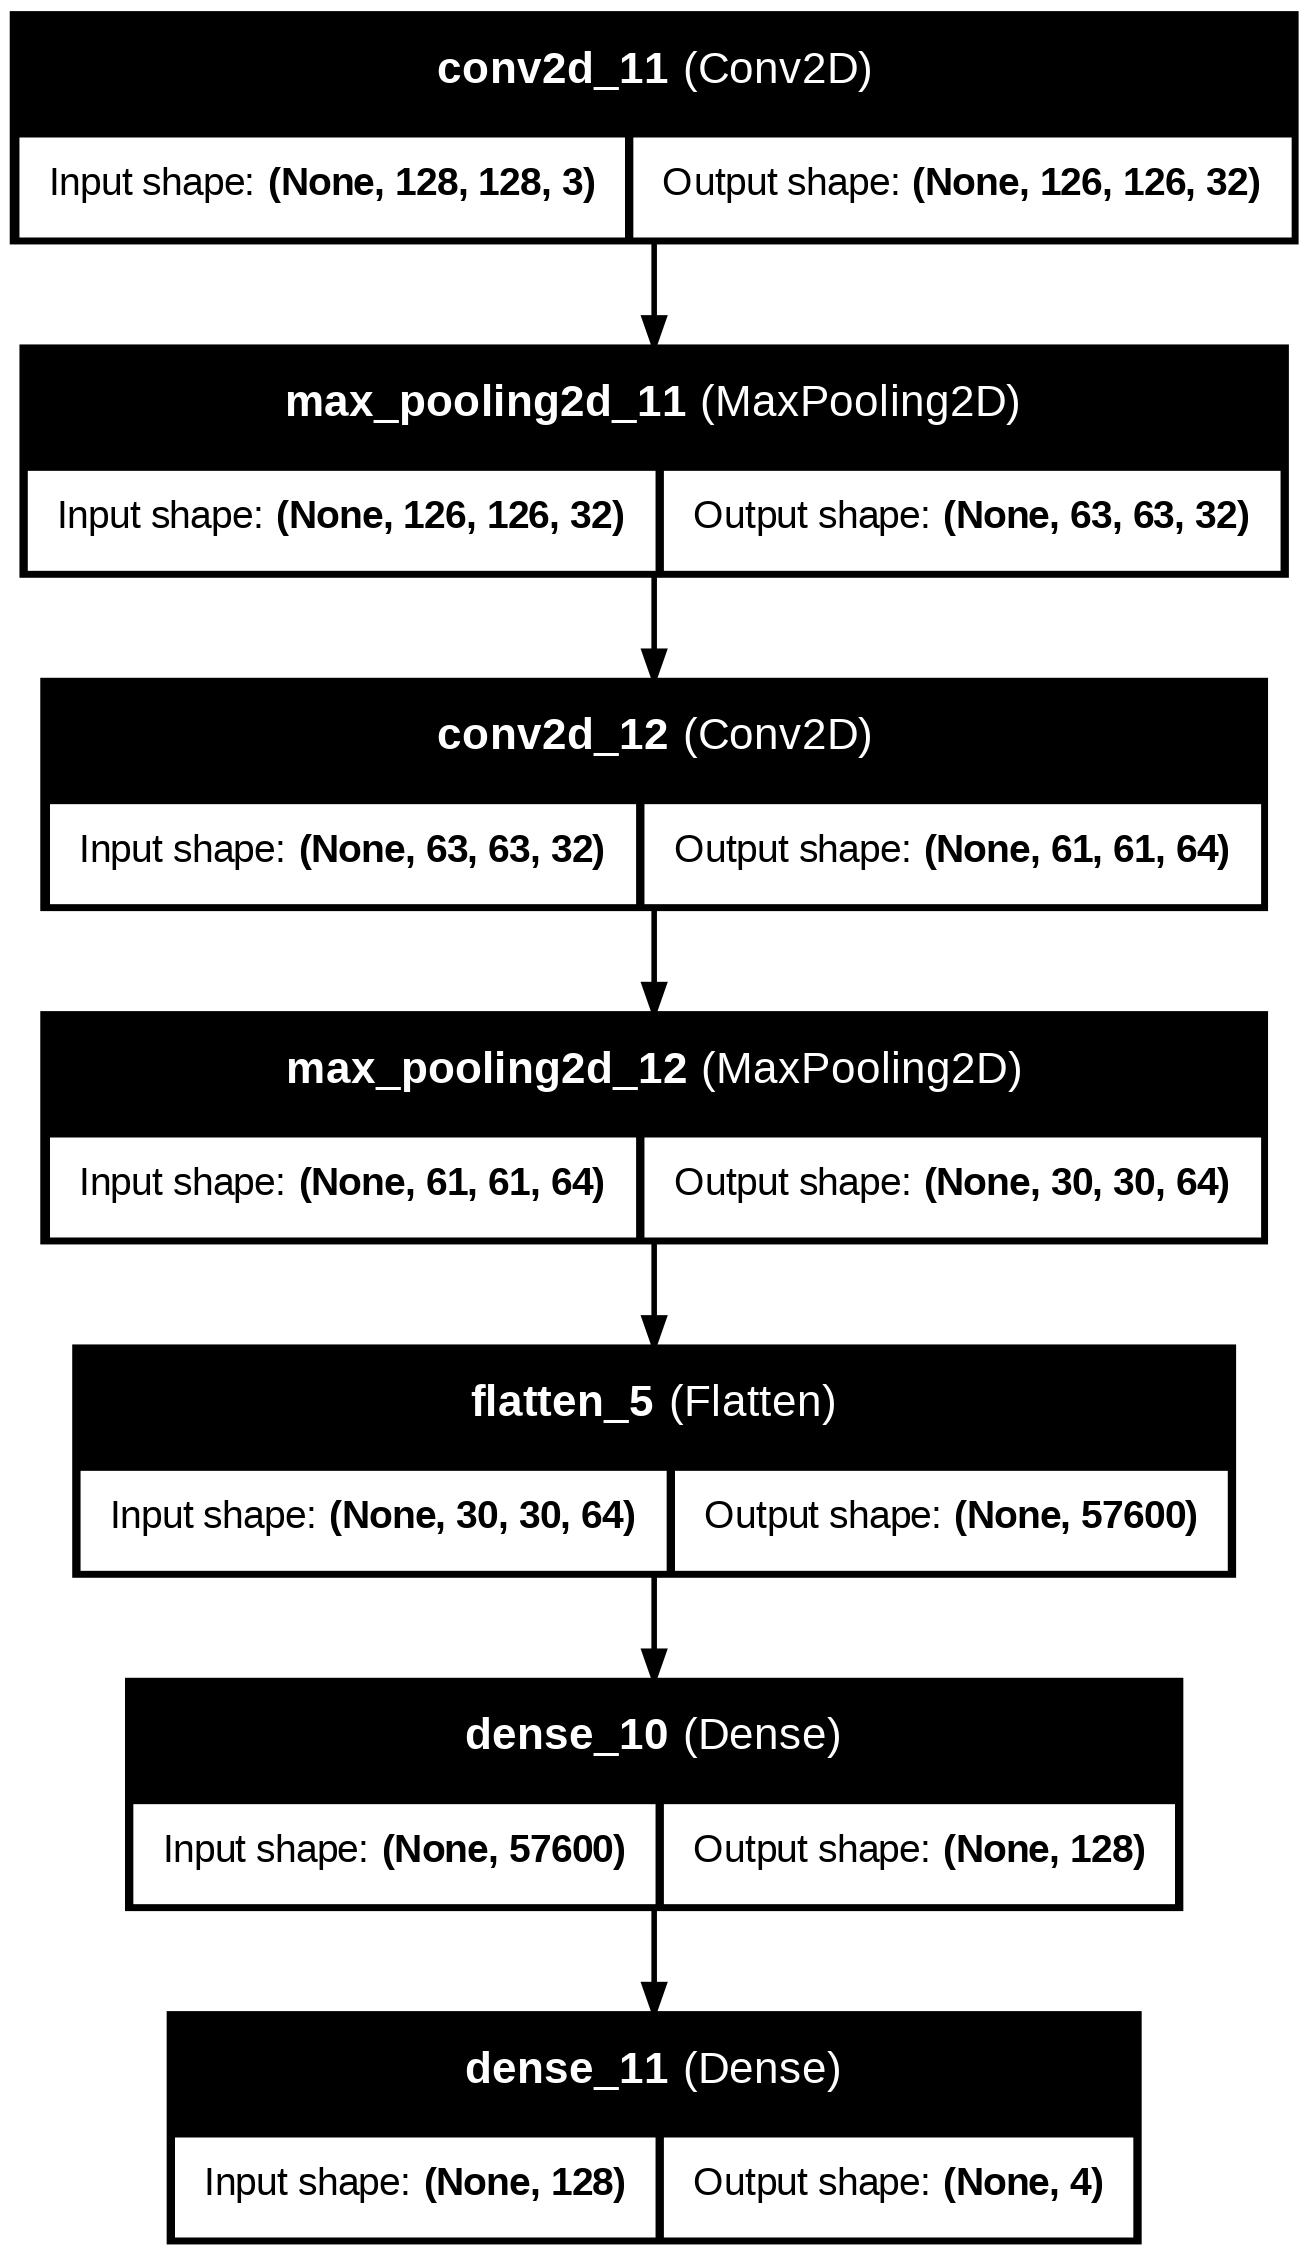

In [42]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

In [43]:
import numpy as np
import requests
import tempfile
from tensorflow.keras.preprocessing import image

class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

urls = [
    'https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
    'https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg'
]

for url in urls:
    response = requests.get(url)

    with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as f:
        f.write(response.content)

        # 🔴 MUST match model input size
        img = image.load_img(f.name, target_size=(128, 128))
        img = image.img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img)
        label = class_names[np.argmax(pred)]

        print(f"{url} → {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg → Desert
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg → Cloudy


In [55]:
from tensorflow.keras.models import load_model

# Save the model
model.save("model.h5")
print("Model saved as model.h5")


Model saved as model.h5


In [57]:
from keras.saving import save_model
save_model(model, "model.keras")


In [58]:
model.save("model.h5")  # HDF5 format


In [61]:
# Save in new recommended Keras format
model.save("my_model.keras")


In [62]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("my_model.keras")


In [63]:
import os
print(os.getcwd())


/content
